In [258]:
from scipy.linalg import eigh, norm
import numpy as np
import matplotlib.pyplot as plt

In [225]:
def load_and_center_dataset(filename):
    # Your implementation goes here!
    ds = np.load(filename)
    # print(ds.shape)
    x_avg = np.average(ds, axis=0)
    ds = ds - x_avg
    return ds
    

def get_covariance(dataset):
    ds = dataset
    ds_transpose = np.transpose(dataset)
    covariance_mat = np.dot(ds_transpose, ds) / (len(ds) - 1)
    return covariance_mat

In [226]:
x = load_and_center_dataset("Iris_64x64.npy")

In [227]:
print(x)
S = get_covariance(x)

[[ 95.38004751  90.82422803  87.85510689 ...  -0.20190024   4.3871734
    8.90498812]
 [-20.61995249 -21.17577197 -26.14489311 ...  -2.20190024 -25.6128266
  -16.09501188]
 [ 18.38004751  24.82422803  65.85510689 ... -23.20190024 -37.6128266
  -11.09501188]
 ...
 [156.38004751 158.82422803 156.85510689 ... 148.79809976 148.3871734
  149.90498812]
 [-19.61995249 -13.17577197  -5.14489311 ... -20.20190024 -24.6128266
  -24.09501188]
 [-59.61995249 -56.17577197 -57.14489311 ... -46.20190024 -46.6128266
  -45.09501188]]


In [203]:
S.shape

(4096, 4096)

In [228]:
def get_eig(S, m):
    # Get the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(S, subset_by_index=[S.shape[0]-m, S.shape[0]-1])
    # Get the indices for highest m eigenvalues in reverse order
    # (As we want descending order) and extract the values and vectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_evals = eigenvalues[sorted_indices]
    sorted_evecs = eigenvectors[:, sorted_indices] # This ensures that the sorted_evecs is as per the descending evals
    return np.diag(sorted_evals), sorted_evecs

In [301]:
eigen_val, norm_eigenvec = get_eig(S, 40)

In [302]:
print(eigen_val)

[[4549861.56012991       0.               0.         ...       0.
        0.               0.        ]
 [      0.          927081.17508561       0.         ...       0.
        0.               0.        ]
 [      0.               0.          749615.92150965 ...       0.
        0.               0.        ]
 ...
 [      0.               0.               0.         ...   92250.85173078
        0.               0.        ]
 [      0.               0.               0.         ...       0.
    89474.83075775       0.        ]
 [      0.               0.               0.         ...       0.
        0.           88800.44272553]]


In [303]:
print(norm_eigenvec)

[[-0.0175066  -0.02074179 -0.00093757 ...  0.018765    0.01024314
  -0.01511681]
 [-0.01733378 -0.01866655 -0.00043319 ...  0.02113783  0.00272076
  -0.00325779]
 [-0.01698927 -0.02001655  0.00036106 ...  0.02191802  0.00281618
  -0.00673629]
 ...
 [-0.01411147  0.00016458  0.00305473 ...  0.01219449 -0.00537691
  -0.01760917]
 [-0.01355745  0.00269466  0.00433721 ...  0.01292304 -0.00509642
  -0.01442508]
 [-0.01350912  0.00163433  0.0052329  ...  0.00683312  0.00502192
  -0.02115601]]


In [212]:
def get_eig_prop(S, prop):
    trace = np.trace(S)
    abs_prop = prop * trace
    eigenvalues, eigenvectors = eigh(S, subset_by_value=[abs_prop, np.inf])
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_evals = eigenvalues[sorted_indices]
    sorted_evecs = eigenvectors[:, sorted_indices]
    return np.diag(sorted_evals), sorted_evecs


In [215]:
evals, evec = get_eig_prop(S, 0.07)

In [286]:
def project_image(image, U):
    # print(image.shape)
    print(image)
    print(U.T)
    U_UT = np.dot(U, U.T)
    projection = np.dot(U_UT, image)
    print(projection)
    return projection

In [304]:
project_image(x[20], norm_eigenvec)

[ 76.38004751  80.82422803  90.85510689 ... -40.20190024 -20.6128266
 -14.09501188]
[[-0.0175066  -0.01733378 -0.01698927 ... -0.01411147 -0.01355745
  -0.01350912]
 [-0.02074179 -0.01866655 -0.02001655 ...  0.00016458  0.00269466
   0.00163433]
 [-0.00093757 -0.00043319  0.00036106 ...  0.00305473  0.00433721
   0.0052329 ]
 ...
 [ 0.018765    0.02113783  0.02191802 ...  0.01219449  0.01292304
   0.00683312]
 [ 0.01024314  0.00272076  0.00281618 ... -0.00537691 -0.00509642
   0.00502192]
 [-0.01511681 -0.00325779 -0.00673629 ... -0.01760917 -0.01442508
  -0.02115601]]
[ 48.38916265  44.97938317  45.17464206 ... -23.48476391 -33.74092915
 -26.32463193]


array([ 48.38916265,  44.97938317,  45.17464206, ..., -23.48476391,
       -33.74092915, -26.32463193])

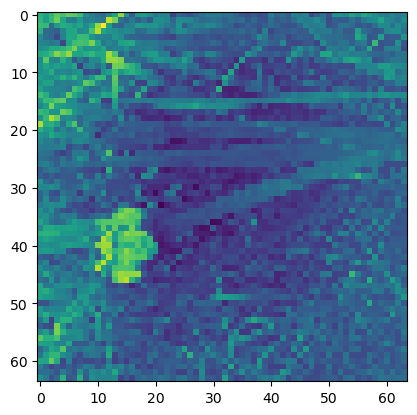

In [305]:
orig = np.reshape(x[20], (64, 64))
plt.imshow(orig.T, aspect="equal")

In [296]:
def display_image(orig, proj):
    # Your implementation goes here!
    # Please use the format below to ensure grading consistency
    orig_reshaped = np.reshape(orig, (64, 64))
    proj_reshaped = np.reshape(proj, (64, 64))
    fig, (ax1, ax2) = plt.subplots(figsize=(9,3), ncols=2)
    ax1.title.set_text("Original")
    ax2.title.set_text("Projection")
    im1 = ax1.imshow(orig_reshaped.T, aspect="equal")
    im2 = ax2.imshow(proj_reshaped.T, aspect="equal")
    fig.colorbar(im1)
    fig.colorbar(im2)
    return fig, ax1, ax2

[ 76.38004751  80.82422803  90.85510689 ... -40.20190024 -20.6128266
 -14.09501188]
[[-0.0175066  -0.01733378 -0.01698927 ... -0.01411147 -0.01355745
  -0.01350912]
 [-0.02074179 -0.01866655 -0.02001655 ...  0.00016458  0.00269466
   0.00163433]
 [-0.00093757 -0.00043319  0.00036106 ...  0.00305473  0.00433721
   0.0052329 ]
 ...
 [ 0.018765    0.02113783  0.02191802 ...  0.01219449  0.01292304
   0.00683312]
 [ 0.01024314  0.00272076  0.00281618 ... -0.00537691 -0.00509642
   0.00502192]
 [-0.01511681 -0.00325779 -0.00673629 ... -0.01760917 -0.01442508
  -0.02115601]]
[ 48.38916265  44.97938317  45.17464206 ... -23.48476391 -33.74092915
 -26.32463193]


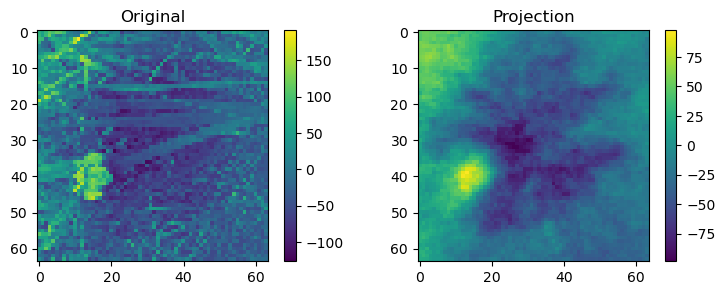

In [306]:
proj = project_image(x[20], norm_eigenvec)
fig, ax1, ax2 = display_image(x[20], proj)